## Exercise 1: Decisive Distributions

### Import Dependencies

In [4]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [5]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-08-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-21", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ['SPY','LUV', 'DIS', 'AAPL', 'SBUX', 'WORK']

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AAPL                                       \
                             open     high       low   close    volume   
2019-08-21 00:00:00-04:00  212.80  213.650  211.6032  212.65  17908140   
2019-08-22 00:00:00-04:00  213.19  214.435  210.7500  212.45  19267504   
2019-08-23 00:00:00-04:00  209.43  212.051  201.0000  202.63  40593444   
2019-08-26 00:00:00-04:00  205.86  207.190  205.0573  206.60  22978406   
2019-08-27 00:00:00-04:00  207.81  208.550  203.5300  204.14  19309254   

                              DIS                                         ...  \
                             open      high       low     close   volume  ...   
2019-08-21 00:00:00-04:00  134.42  136.0599  134.1000  135.7600  5299020  ...   
2019-08-22 00:00:00-04:00  136.20  136.6700  134.6900  136.0801  5728820  ...   
2019-08-23 00:00:00-04:00  135.51  136.4400  131.0234  131.7100  8304634  ...   
2019-08-26 00:00:00-04:00  134.19  134.6400  132.5500  134.6000  6264572  ...   
2019-08-27 00:00:00-04:00  135.77  135.9900  134.1850  134.4400  5096206  ...   

                              SPY                                      WORK  \
                             open    high     low   close     volume   open   
2019-08-21 00:00:00-04:00  292.48  292.86  291.72  292.43   40118468  30.64   
2019-08-22 00:00:00-04:00  293.23  293.93  290.40  292.31   43889705  32.19   
2019-08-23 00:00:00-04:00  290.93  292.76  283.47  284.81  111222081  30.52   
2019-08-26 00:00:00-04:00  287.27  287.99  285.58  287.97   55417381  30.34   
2019-08-27 00:00:00-04:00  289.54  289.95  286.03  286.84   57062542  31.21   

                                                           
                            high      low  close   volume  
2019-08-21 00:00:00-04:00  31.39  30.4400  30.80  2011308  
2019-08-22 00:00:00-04:00  32.48  30.1938  30.55  4899412  
2019-08-23 00:00:00-04:00  30.64  29.9700  30.06  3889525  
2019-08-26 00:00:00-04:00  31.14  30.2200  30.97  3575392  
2019-08-27 00:00:00-04:00  31.27  29.6600  29.91  3198401  

[5 rows x 30 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [7]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-08-21,292.43,50.60,135.7600,212.65,96.32,30.80
2019-08-22,292.31,51.19,136.0801,212.45,96.51,30.55
2019-08-23,284.81,50.57,131.7100,202.63,94.81,30.06
2019-08-26,287.97,50.69,134.6000,206.60,96.50,30.97
2019-08-27,286.84,50.52,134.4400,204.14,96.08,29.91


### Calculate the daily returns for each stock using the `pct_change()` function

In [9]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-08-22,-0.000410,0.011660,0.002358,-0.000941,0.001973,-0.008117
2019-08-23,-0.025658,-0.012112,-0.032114,-0.046223,-0.017615,-0.016039
2019-08-26,0.011095,0.002373,0.021942,0.019592,0.017825,0.030273
2019-08-27,-0.003924,-0.003354,-0.001189,-0.011907,-0.004352,-0.034227
2019-08-28,0.006973,0.013064,0.015546,0.006760,0.010200,-0.003678
2019-08-29,0.012879,0.021884,0.009595,0.017419,0.006491,0.005705
2019-08-30,-0.000367,0.000382,-0.004643,-0.001722,-0.011772,-0.044378
2019-09-03,-0.005737,-0.017966,-0.006778,-0.014588,0.002382,0.004190
2019-09-04,0.010988,0.014013,0.012182,0.017283,-0.006820,0.079277
2019-09-05,0.013097,0.008061,0.006380,0.019211,-0.005619,-0.033344


In [10]:
# Generate descriptive statistics
df_daily_returns.describe()

,SPY,LUV,DIS,AAPL,SBUX,WORK
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000814,-0.000829,0.000143,0.003748,-0.000495,0.000735
std,0.020906,0.036680,0.028151,0.026758,0.028019,0.044192
min,-0.115916,-0.150895,-0.129846,-0.131590,-0.166167,-0.142066
25%,-0.004173,-0.012225,-0.010095,-0.006467,-0.011095,-0.022086
50%,0.001850,-0.000189,-0.000538,0.003840,-0.000343,0.000364
75%,0.007603,0.011293,0.010649,0.016182,0.010142,0.023590
max,0.094737,0.144441,0.142840,0.121210,0.148646,0.170588


### Plot Distributions

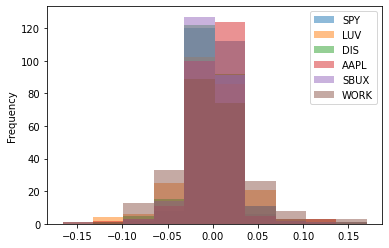

In [11]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
df_daily_returns.plot.hist(alpha = 0.5)

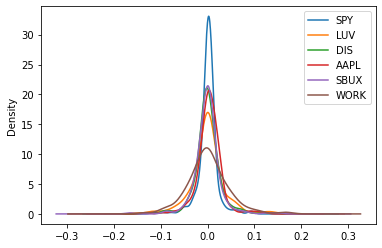

In [12]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns.plot.density()